# To build a recommendation system using the Random Forest algorithm 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
books = pd.read_csv("C:\\Users\\Narthana\\Downloads\\Books.csv", encoding="latin1")
users = pd.read_csv("C:\\Users\\Narthana\\Downloads\\Users.csv", encoding="latin1")
ratings = pd.read_csv("C:\\Users\\Narthana\\Downloads\\Ratings.csv", encoding="latin1")


C:\Users\Narthana\AppData\Local\Temp\ipykernel_8796\1601205249.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("C:\\Users\\Narthana\\Downloads\\Books.csv", encoding="latin1")


In [3]:
# Merge the data
data = pd.merge(ratings, users, on="User-ID", how="inner")
data = pd.merge(data, books, on="ISBN", how="inner")

# Handle missing values (if any)
data = data.dropna()

# Encode categorical features (e.g., Location)
data["Location"] = pd.factorize(data["Location"])[0]

# Select relevant features
X = data[["User-ID", "Location", "Age"]]
y = data["Book-Rating"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [6]:
y_pred = rf_model.predict(X_test)


Mean Squared Error: 11.581405202245334


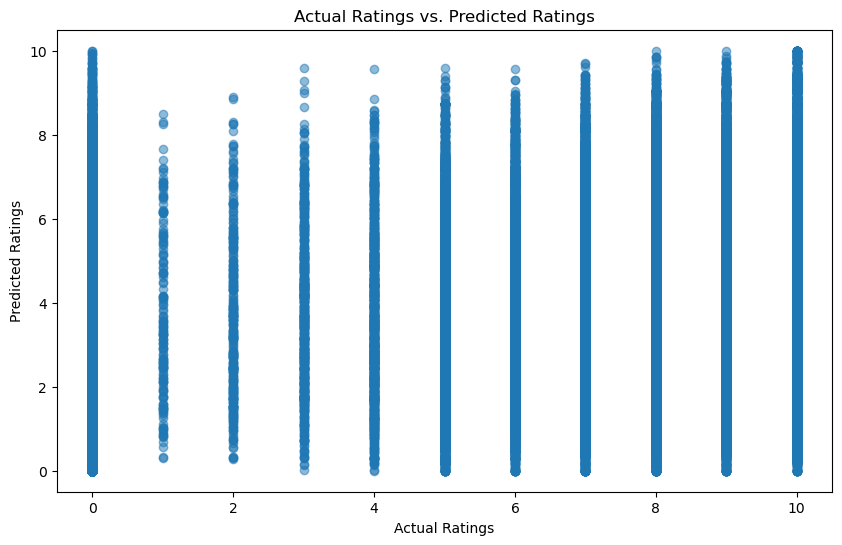

In [7]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predicted vs. actual ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual Ratings vs. Predicted Ratings")
plt.show()


In [13]:
def recommend_books(user_id, num_recommendations=10):
    if user_id not in data["User-ID"].unique():
        return "User not found in the dataset."

    # Filter books that the user has not rated
    user_rated_books = data[data["User-ID"] == user_id]["ISBN"]
    books_to_recommend = data[~data["ISBN"].isin(user_rated_books)]

    if books_to_recommend.empty:
        return "User has rated all books in the dataset."

    # Predict ratings for the remaining books
    user_data = pd.DataFrame({"User-ID": [user_id] * len(books_to_recommend),
                              "Location": [data[data["User-ID"] == user_id]["Location"].values[0]] * len(books_to_recommend),
                              "Age": [data[data["User-ID"] == user_id]["Age"].values[0]] * len(books_to_recommend)})
    predicted_ratings = rf_model.predict(user_data)

    # Add predicted ratings to the books
    books_to_recommend["Predicted_Rating"] = predicted_ratings

    # Sort books by predicted rating
    recommended_books = books_to_recommend.sort_values(by="Predicted_Rating", ascending=False)

    return recommended_books[["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication"]].head(num_recommendations)

# Example: Recommend top 10 books for a user with User-ID 276729
user_id = 276729
recommended_books = recommend_books(user_id)
print(recommended_books)


C:\Users\Narthana\AppData\Local\Temp\ipykernel_8796\1974076684.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_to_recommend["Predicted_Rating"] = predicted_ratings


              ISBN                                         Book-Title  \
1       034545104X                               Flesh Tones: A Novel   
701409  0373520018  Wanted: Perfect Partner (Yours Truly #1) (Silh...   
701412  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701413  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701414  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701415  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701416  0373707037   Under One Roof (Harlequin Superromance, No. 703)   
701417  0373710852  Montana Dreaming  (Home On The Ranch) (Harlequ...   
701419  0373710852  Montana Dreaming  (Home On The Ranch) (Harlequ...   
701420  0373710852  Montana Dreaming  (Home On The Ranch) (Harlequ...   

            Book-Author Year-Of-Publication  
1            M. J. Rose                2002  
701409  Debbie MacOmber                1995  
701412  Shannon Waverly                1996  
701413  Shan

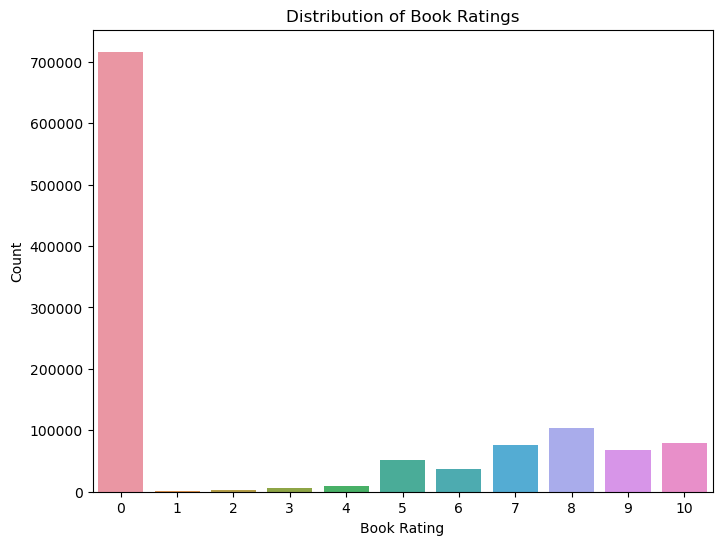

In [15]:
# Data Exploration
# Visualization 1: Distribution of Book Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()


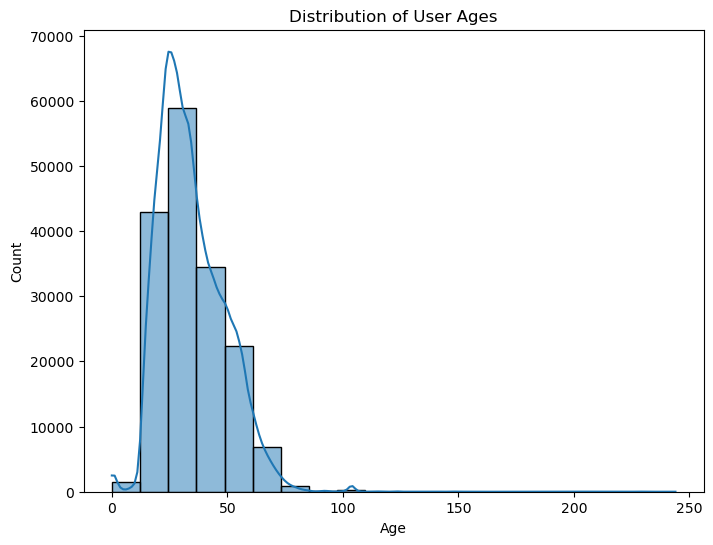

In [16]:
# Visualization 2: Distribution of User Ages
plt.figure(figsize=(8, 6))
sns.histplot(users['Age'], bins=20, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


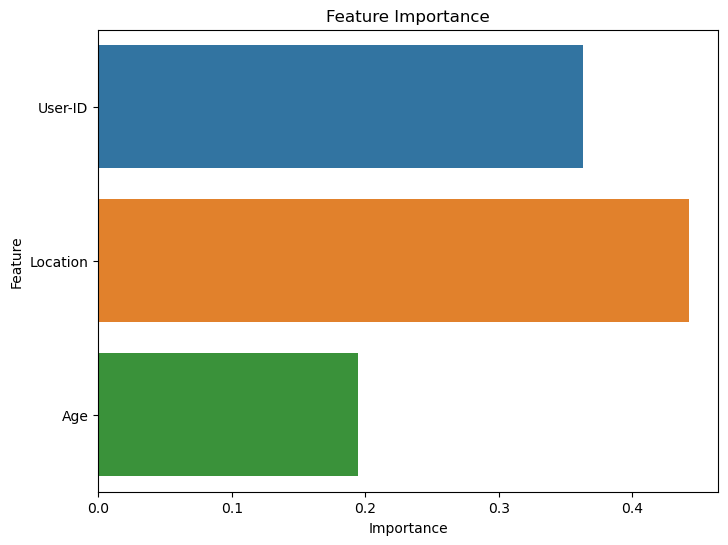

In [18]:
# Visualization 4: Feature Importance
feature_importance = rf_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [19]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


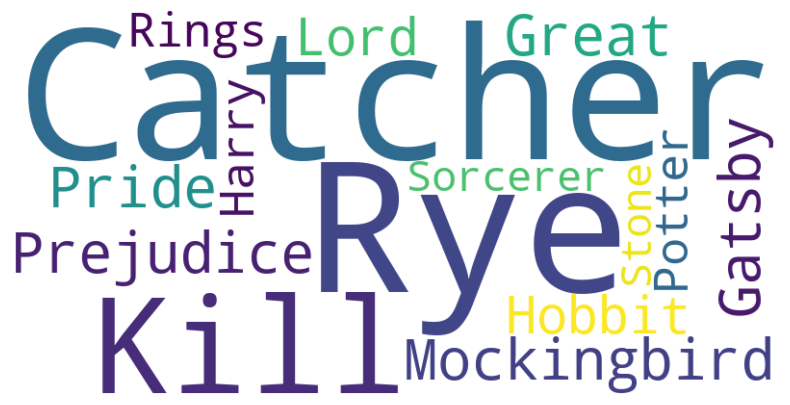

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample list of book titles (replace with your data)
book_titles = [
    "The Catcher in the Rye", "To Kill a Mockingbird", "1984",
    "Pride and Prejudice", "The Great Gatsby", "The Hobbit",
    "The Lord of the Rings", "Harry Potter and the Sorcerer's Stone"
]

# Convert the list of titles to a string
text = " ".join(book_titles)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()


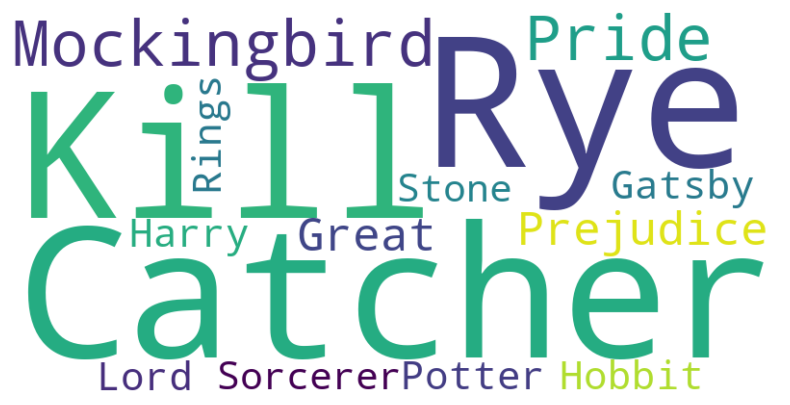

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample list of recommended book titles (replace with your data)
recommended_books = [
    "The Catcher in the Rye", "To Kill a Mockingbird", "1984",
    "Pride and Prejudice", "The Great Gatsby", "The Hobbit",
    "The Lord of the Rings", "Harry Potter and the Sorcerer's Stone"
]

# Convert the list of recommended book titles to a string
recommended_books_text = " ".join(recommended_books)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(recommended_books_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()
